In [85]:
#install.packages("openintro")
library(openintro)
data(COL)# color

# BUS 230: Elementary Statistics

*Camuson College*

2017.11.23

Jon Duan

# BUS 230: Introduction to Statistics
## T Test of Population Mean

*Camuson College*

2017.11.23

Jon Duan

## A basic statistics course. 

The emphasis is on business applications of statistical methods. The contents of the course are: 

- how to describe data; 

- analysis of decisions made with uncertainty; 

- analysis of statistical data; 

- and making predictions based on statistical data.



![](https://archive.cnx.org/resources/16c937daf5012db1b115922dd2bbf82fdb422604/Diagram%202.png)

## Learning Objectives

- Learn to use T test to examine a real problem

 - an accounting procedures problem: inventory evaluation
  - LIFO (Last in First Out) 
  - FIFO (First in First Out). 

## Recap - **[Four steps of Hypothesis test](https://onlinecourses.science.psu.edu/stat100/node/64)**:


- Step One: State the null and alternative hypotheses
- Step Two: Collect and summarize the data so that a test statistic can be calculated. 
- A **test statistic** is a summary of the data that measures the difference between what is seen in the data and what would be expected if the null hypothesis were true. It is typically standardized so that a p-value can be obtained from a reference distribution like the normal curve.

- Step Three: Use the test statistic to find the p-value. 
- Step Four: Make a decision using the p-value. State a conclusion in terms of the problem.

  



## Recap - Types of Errors

- **Typy I error**:  reject a null hypothesis that is really true (with tests of difference this means that you say there was a difference between the groups when there really was not a difference).  

- **significant level $\alpha$**: the probability of making a Type I error is the $\alpha$ level you choose.

- **Type II error $\beta$** : fail to reject a null hypothesis that is false (with tests of differences this means that you say there was no difference between the groups when there really was one)

- **power $(1- \beta) $** is the probability of rejecting the null hypothesis when the specific alternative hypothesis is true. 





![](http://slideplayer.com/slide/7211254/24/images/23/True+state+of+nature+Decision+The+null+hypothesis+is+true..jpg)

## Recap - P-value

- The **p-value** represents the likelihood of getting our test statistic or any test statistic more extreme, if in fact the null hypothesis is true.
  - For a one-sided "greater than" alternative hypothesis, the "more extreme" part of the interpretation refers to test statistic values larger than the test statistic given.
  - For a one-sided "less than" alternative hypothesis, the "more extreme" part of the interpretation refers to test statistic values smaller than the test statistic given.
  - For a two-sided "not equal to" alternative hypothesis, the "more extreme" part of the interpretation refers to test statistic values that are farther away from the null hypothesis than the test statistic given at either the upper end or lower end of the reference distribution (both "tails").



## Recap - Types of T Tests

- One and two sample hypothesis testing

- Three Types of t tests

![](https://researchbasics.education.uconn.edu/wp-content/uploads/sites/1215/2015/05/t-test1.jpg)


## Pair-difference T test

- t-test for dependent groups, correlated t test 

- df= n (number of pairs) -1

- compares the difference between the average scores of a single sample of individuals who are assessed at two different times (such as before treatment and after treatment). 

- or compares average scores of samples of individuals who are paired in some way (such as siblings, mothers, daughters, persons who are matched in terms of a particular characteristics).

## T test for Independent Samples (with two options)


- compares the averages of two samples that were selected independently of each other. 

- Equal Variance (Pooled-variance t-test) 

 - df=n (total of both groups) -2      
 - $s_p =\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$
 - $t^{*}=\frac{{\bar{x}}_1-{\bar{x}}_2}{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$


- Unequal Variance (Separate-variance t test) 
 - df dependents on a formula, but a rough estimate is one less than the smallest group  
 - $s_1 \ne s_2$ 
 - $\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$
 - $t^{*}=\frac{{\bar{x}}_1-{\bar{x}}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$


### How do I decide which type of t test to use?

![](https://researchbasics.education.uconn.edu/wp-content/uploads/sites/1215/2015/05/t-test-decisions1.gif)


# Case Study

**Homework question**: Accounting procedures allow a business to evaluate their inventory at LIFO (Last in First Out) or FIFO (First in First Out). 

A manufacturer evaluated its finished goods inventory (in $ thousands) for five products both ways. 

Based on the following results, is LIFO more effective in keeping the value of inventory lower?

| Product  | FIFO (F)  | LIFO (L) |
|----------|-----------|----------|
| 1        | 225       | 221      |
| 2        | 119       | 100      |
| 3        | 100       | 113      |
| 4        | 212       | 200      |
| 5        | 248       | 245      | 


Use a 5% significance level.

**Question:** is this a paired means or independent means test?

In [86]:
#inventory = read.csv("statsTeaching.csv")
Product <- c(1,2,3,4,5)
FIFO <- c(225 ,119,100,212,248)
LIFO <- c(221 ,100,113,200,245)
inventory =  data.frame(Product, FIFO, LIFO)
inventory$difference = inventory$FIFO-inventory$LIFO
inventory

Product,FIFO,LIFO,difference
1,225,221,4
2,119,100,19
3,100,113,-13
4,212,200,12
5,248,245,3


In [87]:
summary(inventory[-1])

      FIFO            LIFO         difference 
 Min.   :100.0   Min.   :100.0   Min.   :-13  
 1st Qu.:119.0   1st Qu.:113.0   1st Qu.:  3  
 Median :212.0   Median :200.0   Median :  4  
 Mean   :180.8   Mean   :175.8   Mean   :  5  
 3rd Qu.:225.0   3rd Qu.:221.0   3rd Qu.: 12  
 Max.   :248.0   Max.   :245.0   Max.   : 19  

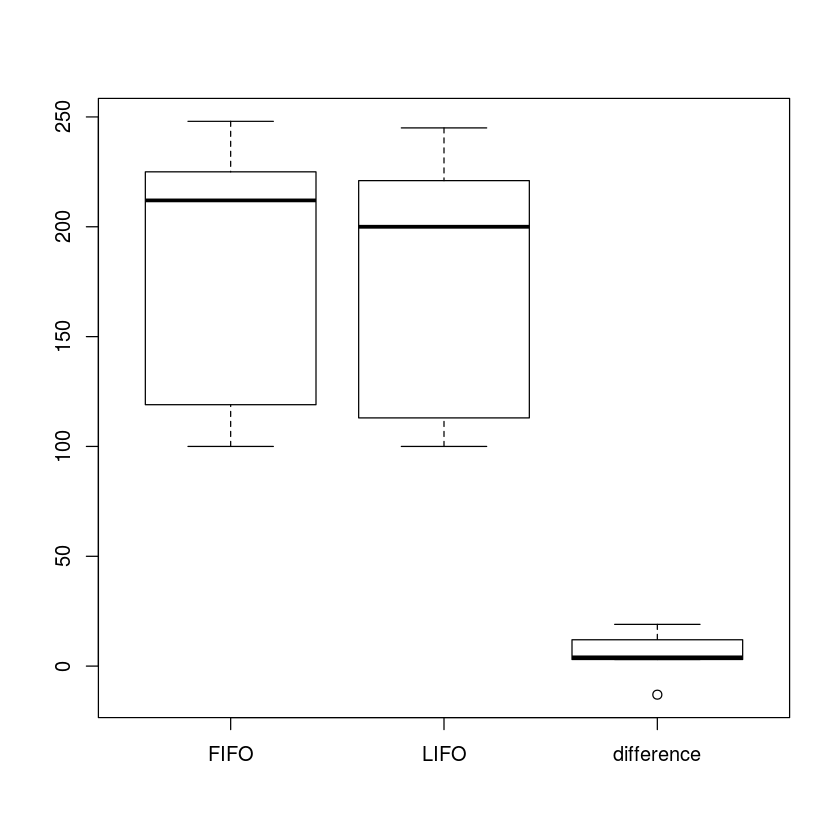

In [88]:
boxplot(inventory[-1])

## The Paired t-Procedure
### Assumptions:

1. Paired samples
2. The differences of the pairs follow a normal distribution or the number of pairs is large (note here that if the number of pairs is < 30, we need to check whether the differences are normal, but we do not need to check for the normality of each population)


### Assumptions:

1. Is this a paired sample? - Yes.

2. Is this a large sample? - No.

3. Since the sample size is not large enough (less than 30), we need to check whether the differences follow a normal distribution.





ref:

https://onlinecourses.science.psu.edu/stat500/node/51

https://www2.stat.duke.edu/courses/Spring13/sta101.001/slides/unit4lec1H.pdf


In [90]:
shapiro.test(inventory$difference) ## Perform the normality test


	Shapiro-Wilk normality test

data:  inventory$difference
W = 0.95726, p-value = 0.7888


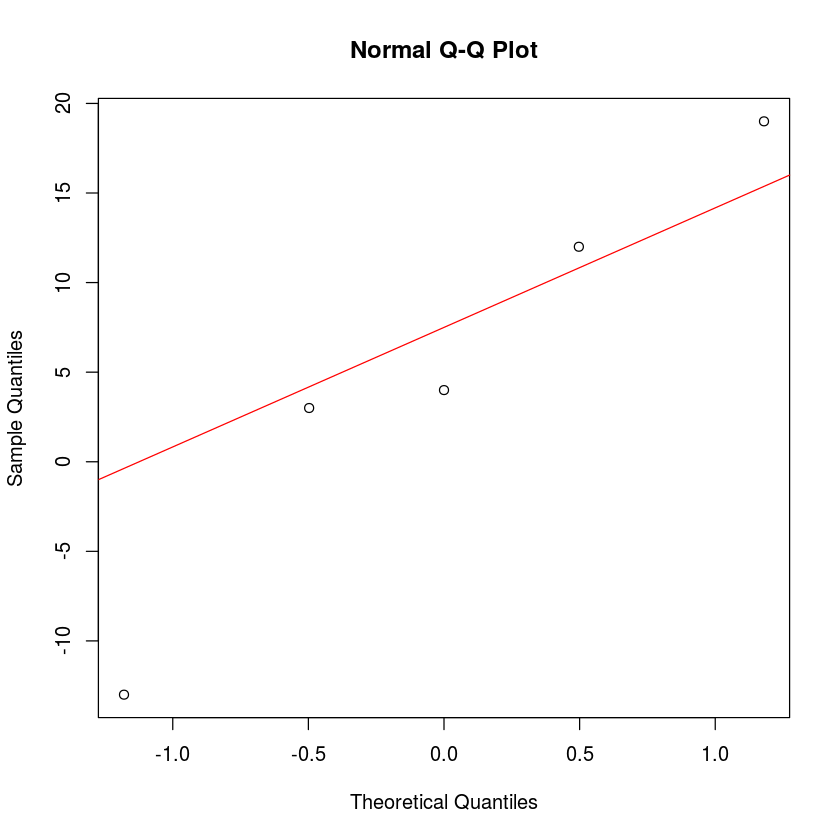

In [91]:
qqnorm(inventory$difference);qqline(inventory$difference, col = 2) ## Plot using a qqplot

In [89]:

## Have a look at the densities
#plot(density(inventory$difference))



## 1. Hypothesis:

$$H_0: \mu_d = 0    \quad \quad H_a: \mu_d > 0$$

**counterfactual argument:**

If we seek strong evidence in favor of a particular outcome, we define that outcome as the alternative hypothesis, $H_1$, and the other outcome as the null hypothesis ,$H_0$.  

 

- When reject $H_0$, there is strong evidence in favor of $H_1$, and we are confident that our decision is correct.

- But failing to reject $H_0$ leads to great uncertainty. 



## 2. t-statistic:

Let $d =$ differences between the pairs of data,  then $\bar d =$  mean of these differences.

- The test statistics is: $t^{*}=\frac{\bar{d}-0}{{s_d}/\sqrt{n}}$

- degrees of freedom = $n - 1$

where $n$ denotes the number of pairs or the number of differences. ${s_d }$  is the standard deviation of the sample differences



## 3 Decision rule

- choose 5% significant level, calculate t critical value: 

 - if t score $t^* \ge t_{\alpha/2}$, we reject $H_0$

or 

- compute p-value according to the t score:  

 - if p-value is less than 5%, we reject $H_0$

In [92]:
n = 5 # number of observation
df = n-1 # degree of freedom
(dbar= mean(inventory$difference))# mean of differences

[1] 5

In [93]:
(sd_d= sd(inventory$difference)) # standard deviation of differences

[1] 11.97915

In [94]:
(SE =  sd_d/sqrt(n)) # standard error of the mean of difference

[1] 5.357238

In [95]:
(t_score =  (dbar-0)/(SE )) # t score / observed t value

[1] 0.9333167

In [96]:
(t_crit = qt(0.95 ,df = df)) # critical value for decision rule

[1] 2.131847

In [97]:
nullval = 0 # null value 
(p_value = pt(t_score, df = df, lower.tail = FALSE) )# oneside t test, p-value

[1] 0.2017461

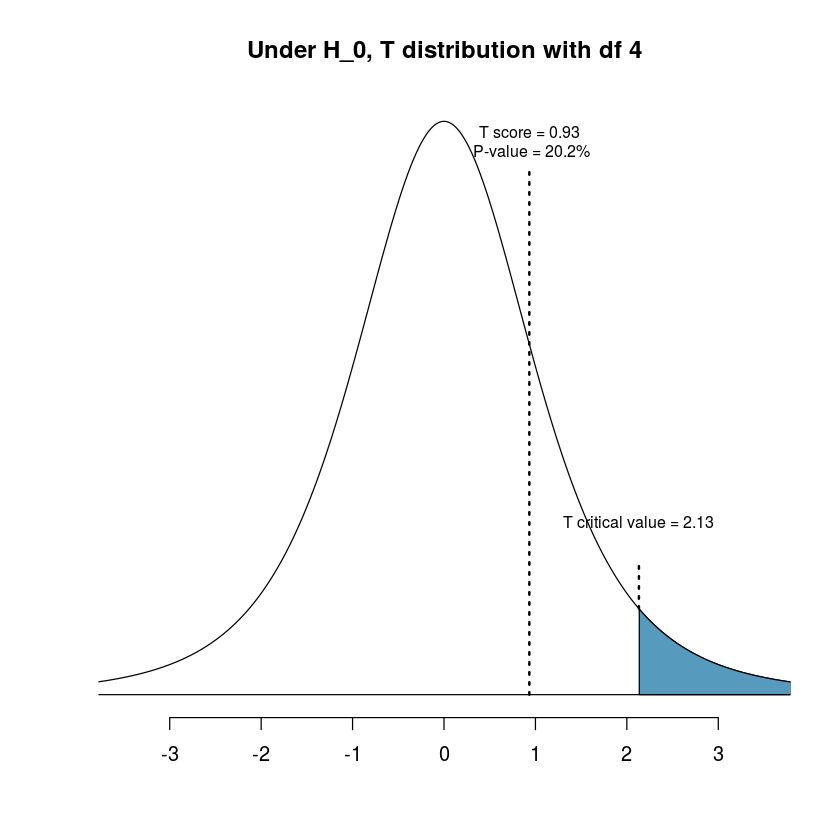

In [128]:
tcrit = qt(0.05, df = df, lower.tail = FALSE)
tdens = dt(tcrit, df=df)
normTail(m=nullval,  U = tcrit, df = df, col = COL[1], main = "Under H_0, T distribution with df 4")
lines(c(tcrit, tcrit), c(tdens, tdens*1.5), lty = 3, lwd = 2)
text(tcrit, tdens*1.8, paste0("T critical value = ", round(tcrit,2)), pos = 3,cex = 0.8)
lines(c(t_score, t_score),   c(0, dt(t_score, df=df)*1.5), lty = 3, lwd = 2)
text(t_score, dt(t_score, df=df)*1.5, paste0("T score = ", round(t_score,2), "\n P-value = ", round(p_value,3)*100, "%"),
     pos = 3, cex = 0.8)

In [99]:
t.test(inventory$difference, alt="greater")


	One Sample t-test

data:  inventory$difference
t = 0.93332, df = 4, p-value = 0.2017
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -6.420811       Inf
sample estimates:
mean of x 
        5 



#ref: https://statistics.berkeley.edu/computing/r-t-tests
#ref: https://www.r-bloggers.com/paired-students-t-test/

In [100]:
t.test(inventory$FIFO, inventory$LIFO, paired=TRUE, alt="greater")


	Paired t-test

data:  inventory$FIFO and inventory$LIFO
t = 0.93332, df = 4, p-value = 0.2017
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -6.420811       Inf
sample estimates:
mean of the differences 
                      5 


Single mean 
Summary statistics: mean = 5 ;  sd = 11.9791 ;  n = 5 
H0: mu = 0 
HA: mu > 0 
Standard error = 5.3572 
Test statistic: T = 0.933 
Degrees of freedom:  4 
p-value =  0.2017 


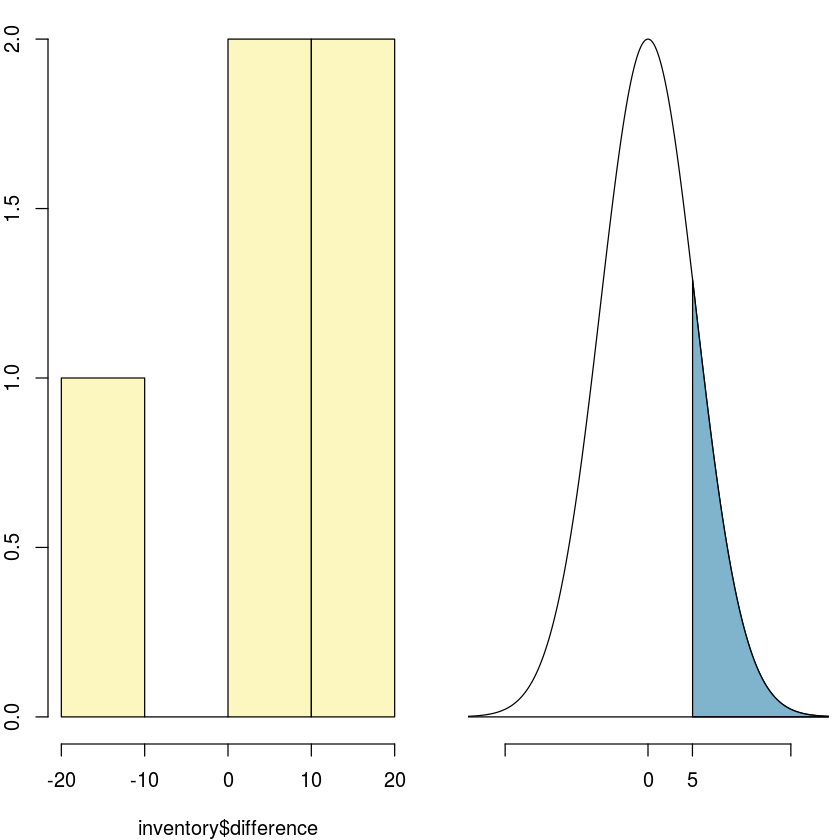

In [102]:
source("http://www.openintro.org/stat/slides/inference.R")
inference(inventory$difference, est="mean", method="theoretical", type="ht", alternative="greater", null=nullval)

## Simulation method

Since the sample size is small, the simulation method is a way to go.

Single mean 
Summary statistics: mean = 5 ;  sd = 11.9791 ;  n = 5 
H0: mu = 0 
HA: mu > 0 
p-value =  0.1305 


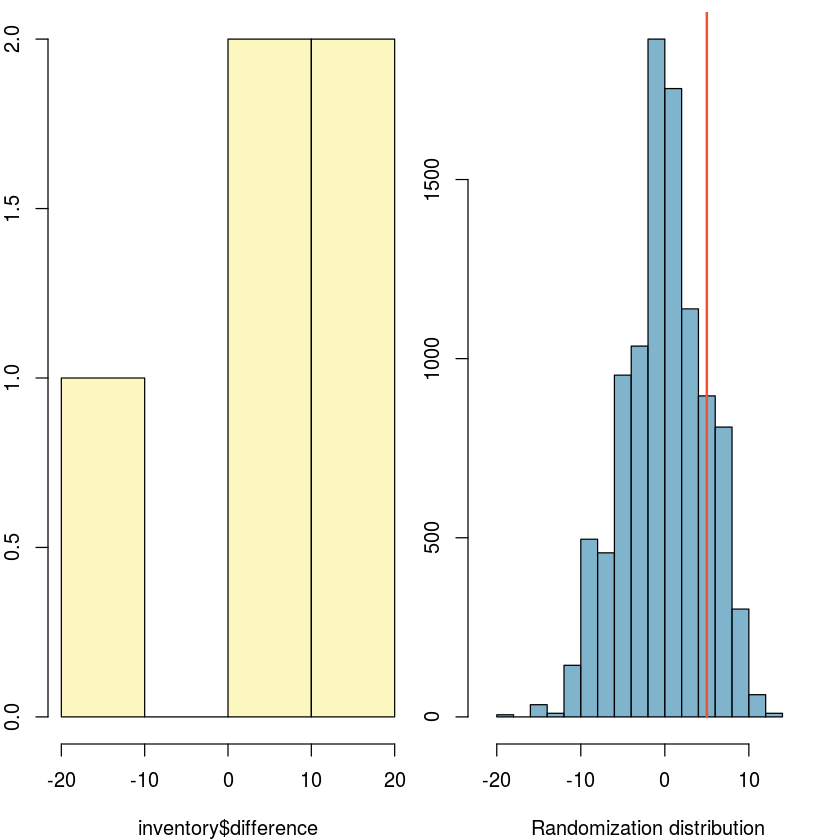

In [103]:
inference(inventory$difference, est="mean", method="simulation", type="ht", alternative="greater", null=nullval)

## 4. Conclusion: We fail to reject $H_0$

If we fail to reject, then either the null hypothesis is true or our procedure for detecting a false null hypothesis does not have sufficient power-- for example, the sample size is too small. 

## Power Analysis




![](http://images.slideplayer.com/24/7575983/slides/slide_53.jpg)

## Power increases and SE decreases when the sample size increases.

![](http://my.ilstu.edu/~wjschne/138/Power/PowerSampleSize.gif)

In [104]:
sd_d

[1] 11.97915

In [105]:
SE

[1] 5.357238

## Choose Effective Size 10



In [129]:
#if we care about if the difference will be 10 or larger, we can choose effect size as 10
effect_size = 10

In [107]:
(t_crit_2 = qt( 0.95, df = df))# quantile on null hypothesis

[1] 2.131847

In [130]:
(t_score_power =  (t_crit_2*SE-effect_size)/SE) # quantile on alternative hypothesis

[1] 0.2652133

In [131]:
(power_test =  pt(t_score_power, df=df, lower.tail = FALSE)) # power undet this effect size 10

[1] 0.401976

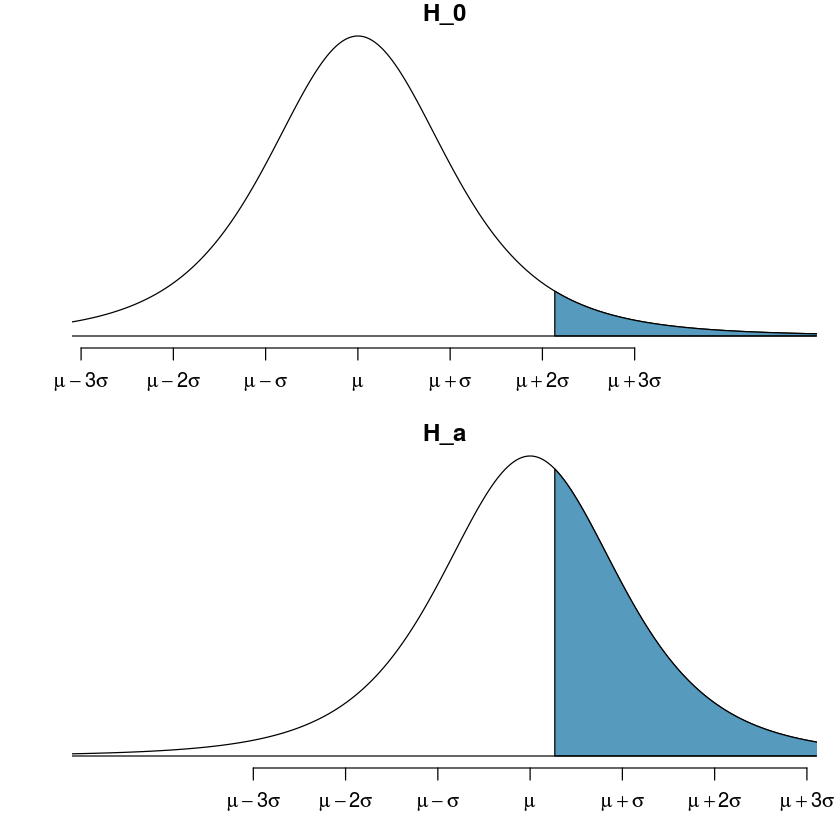

In [110]:
par(mfrow = c(2, 1), mar = c(3, 3, 1, 1))
normTail(m=nullval, s=SE, df= df, U = t_crit_2*SE, xLab = 'symbol',xlim=c(-15,25), main = "H_0")
normTail(m=effect_size, s=SE, df= df, U = t_crit_2*SE, xLab = 'symbol',xlim=c(-15,25),main = "H_a")

## Power is about 40.2% for an effective size 10

## How many number of subjects to obtain the desired power 80% of the test with an effect size 10

In [132]:
(quantile_power = qt(0.8, df = df, lower.tail = FALSE))# quantile on alternative hypothesis with power 80%


[1] -0.9409646

In [136]:
(t_crit_2 = qt( 0.95, df = df))# quantile on null hypothesis, one side test with 5% significant level

[1] 2.131847

In [133]:
((abs(quantile_power) + t_crit_2)) # *SE = effect size, distance between H0 and Ha 

[1] 3.072811

In [134]:
(SE_required = effect_size/(abs(quantile_power) + t_crit_2)) # The required SE for mean of difference

[1] 3.254349

In [135]:
(n_required =  sd_d^2 / (SE_required^2)) # the number of observations required to achieve the power 80%

[1] 13.54951

**We need at least 14 observations for each group to achieve the 80% power.**

In [116]:
# power analysis
#install.packages("pwr")
library(pwr)
pwr.t.test(n = n, d = effect_size/sd_d, sig.level = 0.05, 
             alternative = "greater", type = "paired")


     Paired t test power calculation 

              n = 5
              d = 0.8347839
      sig.level = 0.05
          power = 0.4613328
    alternative = greater

NOTE: n is number of *pairs*


In [117]:
pwr.t.test(power = 0.80,d = effect_size/ sd_d, sig.level = 0.05, alternative = "greater",type = "paired")


     Paired t test power calculation 

              n = 10.36626
              d = 0.8347839
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number of *pairs*


In [118]:
power.t.test(n = n , delta= 10,sd = sd_d , sig.level=0.05,type="paired",alternative="one.sided")


     Paired t test power calculation 

              n = 5
          delta = 10
             sd = 11.97915
      sig.level = 0.05
          power = 0.4613328
    alternative = one.sided

NOTE: n is number of *pairs*, sd is std.dev. of *differences* within pairs


In [119]:
power.t.test(power = 0.80 , delta= 10,sd = sd_d , sig.level=0.05,type="paired",alternative="one.sided")


     Paired t test power calculation 

              n = 10.36624
          delta = 10
             sd = 11.97915
      sig.level = 0.05
          power = 0.8
    alternative = one.sided

NOTE: n is number of *pairs*, sd is std.dev. of *differences* within pairs


In [120]:

pwr.t.test(n = n , d=(dbar)/sd_d,sig.level=0.05,type="paired",alternative="greater")



     Paired t test power calculation 

              n = 5
              d = 0.4173919
      sig.level = 0.05
          power = 0.1942463
    alternative = greater

NOTE: n is number of *pairs*


In [121]:
#ref: https://stats.idre.ucla.edu/r/dae/power-analysis-for-paired-sample-t-test/
#https://www.statmethods.net/stats/power.html
# https://www2.stat.duke.edu/courses/Fall13/sta101/slides/unit3lec3H.pdf

In [122]:
# goal to keep alpha and beta low
# power analysis
# install.packages("pwr")
library(pwr)
pwr.t.test(d=(effect_size)/sd_d,power=0.8,sig.level=0.05,type="paired",alternative="greater")

#ref: https://stats.idre.ucla.edu/r/dae/power-analysis-for-paired-sample-t-test/


     Paired t test power calculation 

              n = 10.36626
              d = 0.8347839
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number of *pairs*


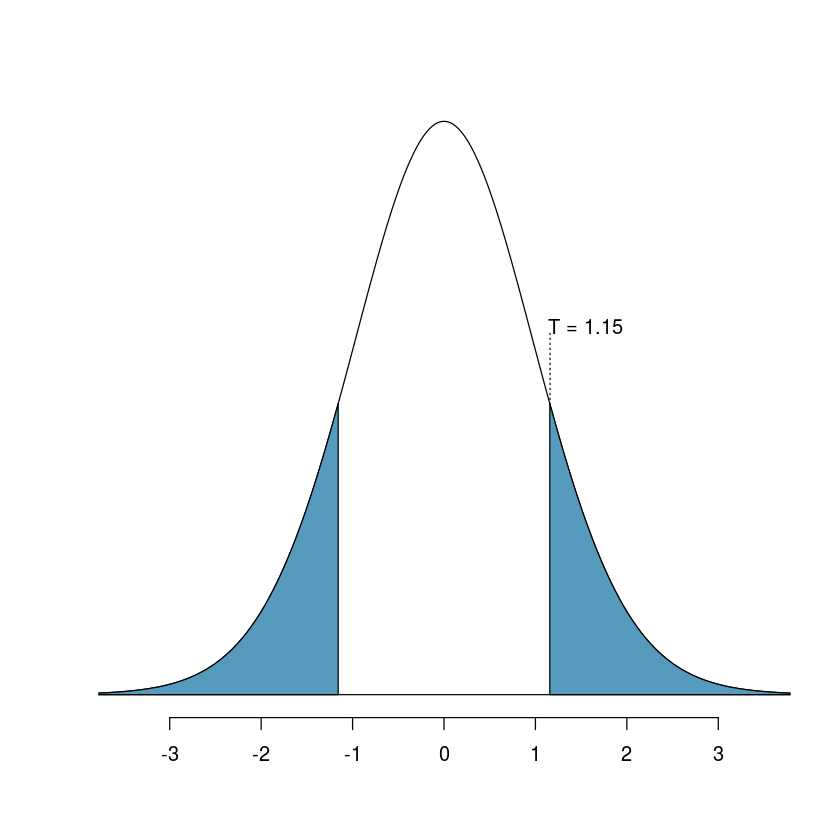

In [123]:
normTail(0, 1,
         L = -1.15,
         U = 1.15,
         df = 26,
         col = COL[1])
lines(c(1.16, 1.16),
      c(dt(1.16, 26), 0.25),
      lty = 3,
      cex = 2)
text(1.55, 0.24, "T = 1.15",
     pos = 3)


	One Sample t-test

data:  x - 100
t = 2.3937, df = 29, p-value = 0.02337
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  5.230773 66.635893
sample estimates:
mean of x 
 35.93333 


[1] 135.9333

[1] 82.22297

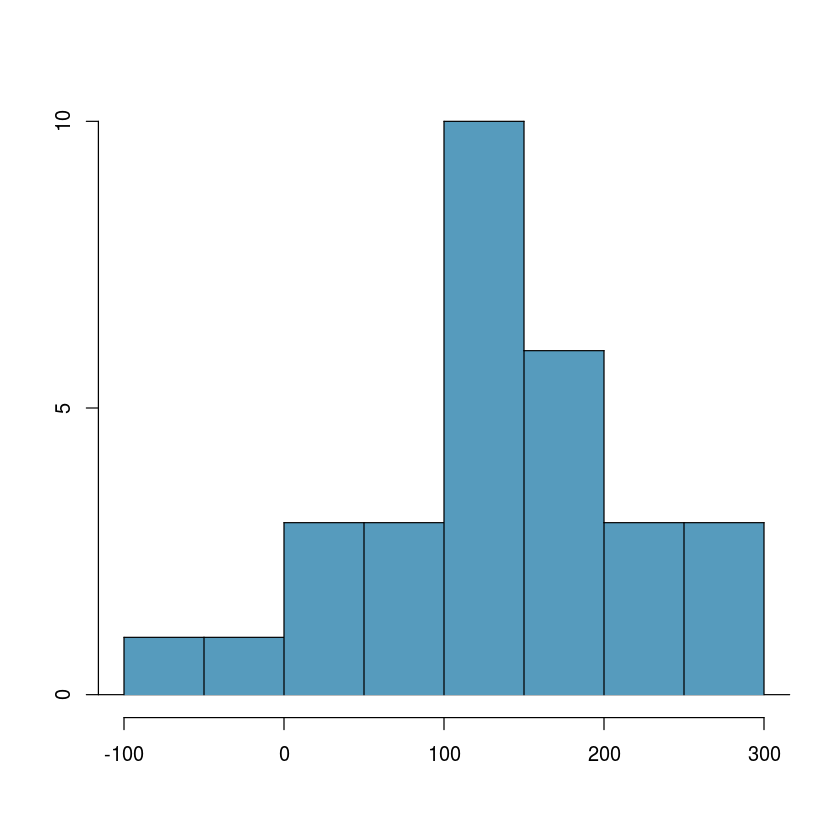

In [124]:
set.seed(2)
x <- round(rnorm(30, 120, 70))
t.test(x - 100)
mean(x)
sd(x)
histPlot(x,
         xlab = '',
         ylab = '',
         main = '',
         axes = FALSE,
         col = COL[1])
axis(1)
axis(2, at = seq(0, 10, 5))

Reference:

t Test

https://researchbasics.education.uconn.edu/t-test/

OpenIntro Statistics

https://www.openintro.org/download.php?file=os3_tablet

An Introduction to Paired-Difference Procedures

https://www.youtube.com/watch?v=tZZt8f8URKg

The Paired-Difference t Procedure

https://www.youtube.com/watch?v=TMRBGFIj0RM

An Example of a Paired-Difference t Test and Confidence Interval

https://www.youtube.com/watch?v=upc4zN_-YFM

Hypothesis Tests for One Population Variance

https://www.youtube.com/watch?v=PweabcpqzYI

Lesson 8 - Comparing Two Population Means, Two Proportions or Two Variances

https://onlinecourses.science.psu.edu/stat500/node/48